In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import random
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d

In [302]:
##This function defines the axes 
def CreateFigure(alpha1, alpha2):
    fig1 = plt.figure()
    plt3d = fig1.gca(projection='3d')
    plt.style.use('dark_background')
    plt.xlim(-2.,12.)
    plt.ylim(-2.,12.)
## If you want to remove the tick uncomment the follwing rows
    #plt3d.set_xticks([])
    #plt3d.set_yticks([])
    #plt3d.set_zticks([])  
    plt3d.grid(False)
    ax_ticks = ([0., 2., 4., 6., 8., 10.])
    plt3d.set_xticks(ax_ticks)
    plt3d.set_yticks(ax_ticks)
    plt3d.set_xlabel("x")
    plt3d.set_ylabel("y")
    plt3d.set_zlabel("z")
    plt3d.view_init(alpha1 ,alpha2)

    return plt3d

In [303]:
def CreateEnvironment(plt3d):
##This function creates the geometry of the apparatus

#Position on the Silicon detectors
    SiUp_coord    = np.array([10, 10, -10.5]) #First Silicon position
    SiDown_coord  = np.array([10, 10, -19.55]) #Second Silicon position

    normal = np.array([0, 0, 1])

    # a plane is a*x+b*y+c*z+d=0
    # [a,b,c] is the normal. Thus, we have to calculate
    # d and we're set
    SiUp_d   = -SiUp_coord.dot(normal)
    SiDown_d = -SiDown_coord.dot(normal)

    # create x,y
    xx, yy   = np.meshgrid(range(10), range(10))
  
    # calculate corresponding z
    SiUp_z   = (-normal[0] * xx - normal[1] * yy - SiUp_d) * 1. /normal[2]
    SiDown_z = (-normal[0] * xx - normal[1] * yy - SiDown_d) * 1. /normal[2]

    # plot the surface
    plt3d.plot_surface(xx, yy, SiUp_z, alpha=0.5, cmap=cm.coolwarm)
    plt3d.plot_surface(xx, yy, SiDown_z, alpha=0.5, cmap=cm.coolwarm)

#Define the position of the  radiator
    Radiator_coord    = np.array([1, 1, -41.55]) #Radiator Position
    x_center  = 4.96292
    y_center  = 3.97302
    radius    = 1.0
    height    = 1.0
    elevation = -42.55
    
    x=np.linspace(x_center-radius, x_center+radius, 50)
    z=np.linspace(-42.55, -41.55, 50)
    Xc, Zc=np.meshgrid(x, z)
    Yc = np.sqrt(radius**2-(Xc-x_center)**2)+y_center 
    
    floor = Circle((x_center, y_center), radius, color='b', alpha = 0.2)
    plt3d.add_patch(floor)
    art3d.pathpatch_2d_to_3d(floor, z=elevation, zdir="z")

    ceiling = Circle((x_center, y_center), radius, color='b', alpha = 0.2)
    plt3d.add_patch(ceiling)
    art3d.pathpatch_2d_to_3d(ceiling, z=elevation+height, zdir="z")
    
    plt3d.plot_surface(Xc, Yc, Zc, alpha=0.2, color = 'b')
    plt3d.plot_surface(Xc, -Yc+2*y_center, Zc, alpha=0.2, color = 'b')

In [304]:
##This function read the (x,y,z) coordinates of the hit point
def ReadHit(filename):
    hit_coord = np.loadtxt(filename)
    return hit_coord

In [305]:
##This function read the hit channels
def ReadHitChannels(filename):
    hit_channels = np.loadtxt(filename)
    return hit_channels

In [306]:
def PlotTrace(plt3d, HitPoint):
    plt3d.scatter(HitPoint[:,0], HitPoint[:,1], HitPoint[:,2], c = 'r', marker='*')
    plt3d.plot3D(HitPoint[:,0], HitPoint[:,1], HitPoint[:,2], c='r')

In [307]:
def PlotPMTHits(plt3d, hit_channels, PH_channels, PMT2DMap):
    
    for i in range(len(hit_channels)):
        for m in range(x_channels):
            for n in range(y_channels):
                if (PMT2DMap[m,n] == hit_channels[i]):
                    xx, yy  = np.meshgrid([2.5+(m*0.5),(m*0.5)+3.], [2.5+(n*0.5),(n*0.5)+3.])
                   
                    normal = np.array([0, 0, 1])
                    PMT_coord    = np.array([10, 10, -60]) #PMT hit plan 

                    # a plane is a*x+b*y+c*z+d=0
                    # [a,b,c] is the normal. Thus, we have to calculate
                        # d and we're set
                    PMT_d = -PMT_coord.dot(normal) 

                    PMT_z   = (-normal[0] * xx - normal[1] * yy - PMT_d) * 1. /normal[2]
                    plt3d.plot_surface(xx, yy, PMT_z, alpha=PH_channels[i]/max(PH_channels), color="yellow" )

In [308]:
#####################################
##Store important execution variables

x_channels = 8 #Number of PMT channels in the x-direction
y_channels = 8 #Number of PMT channels in the y-direction

#2D map of the channels
PMT2DMap = np.zeros([x_channels,y_channels])
for i in range(x_channels):
    for j in range(y_channels):
        PMT2DMap[i,j] = i*x_channels+(j+1)
##        
######################################

PMT2DMap = np.rot90(PMT2DMap, k = 1)
print(PMT2DMap)

[[ 8. 16. 24. 32. 40. 48. 56. 64.]
 [ 7. 15. 23. 31. 39. 47. 55. 63.]
 [ 6. 14. 22. 30. 38. 46. 54. 62.]
 [ 5. 13. 21. 29. 37. 45. 53. 61.]
 [ 4. 12. 20. 28. 36. 44. 52. 60.]
 [ 3. 11. 19. 27. 35. 43. 51. 59.]
 [ 2. 10. 18. 26. 34. 42. 50. 58.]
 [ 1.  9. 17. 25. 33. 41. 49. 57.]]


In [328]:
Hits = ReadHit("trace.txt") #Read the coordinates of the hits on the three detectors

In [329]:
hit_channels = ReadHitChannels("hitchannels.txt") #Read the number of PMT channels above threshold

In [330]:
PH_channels = ReadHitChannels("activePH.txt")

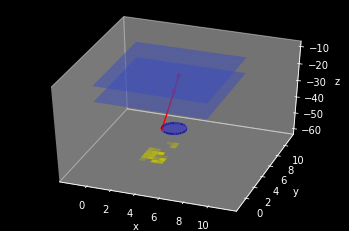

In [331]:
alpha1 = 40
alpha2 = 290
evNumber = 794
plt3d = CreateFigure(alpha1, alpha2)
CreateEnvironment(plt3d)
PlotTrace(plt3d, Hits)
PlotPMTHits(plt3d, hit_channels, PH_channels, PMT2DMap)
plt.savefig("3dplot"+str(evNumber)+"_"+str(alpha1)+"_"+str(alpha2)+"_deg.png")